In [2]:
import pandas as pd
from conda_env.cli.main_list import description
from lightgbm import LGBMRegressor

df = pd.read_csv('Trending Videos of Sony Channel.csv')
ordf = df.copy()
df.head()


,PublishedAt,Title,Description,Tags,View_count,Like_count,Comment_count,estimated_minutes_watched,Thumbnail_Default,Video_URL,Title_length,Description_length
0,2025-01-19T05:16:07Z,Vidaamuyarchi - Pathikichu Lyric | Ajith Kumar...,Lyca Productions \nSubaskaran Presents\nAjith ...,"['Sony Music South', 'Sony Music', 'Tamil Late...",3091770,316774,13135,,https://i.ytimg.com/vi/WR8PyAhn6tQ/default.jpg,https://www.youtube.com/watch?v=WR8PyAhn6tQ,97,2099
1,2025-01-16T13:10:01Z,Vidaamuyarchi Trailer | Ajith Kumar | Trisha |...,"Presenting the Official Trailer of the movie ""...","['vidaamuyarchi trailer', 'vidaamuyarchi bgm',...",12740822,699854,19220,,https://i.ytimg.com/vi/hsoGpoDxyKg/default.jpg,https://www.youtube.com/watch?v=hsoGpoDxyKg,100,1913
2,2025-01-19T14:14:31Z,I MADE SQUID GAME IN MINECRAFT,"So Today, I Recreated Squid Game in Minecraft,...","['minecraft', 'squid game', 'squid game minecr...",1589491,63362,5403,,https://i.ytimg.com/vi/AUyyB5peYck/default.jpg,https://www.youtube.com/watch?v=AUyyB5peYck,30,608
3,2025-01-18T14:10:35Z,"RG Kar Verdict: Lawyer of Sanjoy Roy, Kabita S...",RG Kar Verdict: বিচারপর্বে কী কথা সঞ্জয়ের সঙ্...,"['Bengali News', 'Bangla News', 'RG Kar Verdic...",737284,6856,1600,,https://i.ytimg.com/vi/f8yldW7j35I/default.jpg,https://www.youtube.com/watch?v=f8yldW7j35I,91,897
4,2025-01-17T15:01:22Z,Ashish Chanchlani & Akash Dodeja Roast On Thug...,Welcome to @DominosPizzaIndia Presents The Th...,"['thugesh', 'thugesh thug life', 'thugesh funn...",4382982,379240,18226,,https://i.ytimg.com/vi/X4Y-py3Axyk/default.jpg,https://www.youtube.com/watch?v=X4Y-py3Axyk,86,1748


In [3]:
df = df.drop(columns = ['PublishedAt', 'estimated_minutes_watched', 'Thumbnail_Default', 'Video_URL'], axis =1, inplace = False, errors = 'ignore')
df.head()


,Title,Description,Tags,View_count,Like_count,Comment_count,Title_length,Description_length
0,Vidaamuyarchi - Pathikichu Lyric | Ajith Kumar...,Lyca Productions \nSubaskaran Presents\nAjith ...,"['Sony Music South', 'Sony Music', 'Tamil Late...",3091770,316774,13135,97,2099
1,Vidaamuyarchi Trailer | Ajith Kumar | Trisha |...,"Presenting the Official Trailer of the movie ""...","['vidaamuyarchi trailer', 'vidaamuyarchi bgm',...",12740822,699854,19220,100,1913
2,I MADE SQUID GAME IN MINECRAFT,"So Today, I Recreated Squid Game in Minecraft,...","['minecraft', 'squid game', 'squid game minecr...",1589491,63362,5403,30,608
3,"RG Kar Verdict: Lawyer of Sanjoy Roy, Kabita S...",RG Kar Verdict: বিচারপর্বে কী কথা সঞ্জয়ের সঙ্...,"['Bengali News', 'Bangla News', 'RG Kar Verdic...",737284,6856,1600,91,897
4,Ashish Chanchlani & Akash Dodeja Roast On Thug...,Welcome to @DominosPizzaIndia Presents The Th...,"['thugesh', 'thugesh thug life', 'thugesh funn...",4382982,379240,18226,86,1748


In [4]:
df['Title'] = df['Title'].str.replace(r'[^a-zA-Z\s]', '', regex = True)
df['Tags'] = df['Tags'].str.replace(r'[^a-zA-Z\s]', '', regex = True)
df['Description'] = df['Description'].str.replace(r'[^a-zA-Z\s]', '', regex = True)
df['Description'] = df['Description'].str.replace(r'\n', '', regex = True)

df.head()

,Title,Description,Tags,View_count,Like_count,Comment_count,Title_length,Description_length
0,Vidaamuyarchi Pathikichu Lyric Ajith Kumar ...,Lyca Productions Subaskaran PresentsAjith Kuma...,Sony Music South Sony Music Tamil Latest Song ...,3091770,316774,13135,97,2099
1,Vidaamuyarchi Trailer Ajith Kumar Trisha Ar...,Presenting the Official Trailer of the movie V...,vidaamuyarchi trailer vidaamuyarchi bgm vidaam...,12740822,699854,19220,100,1913
2,I MADE SQUID GAME IN MINECRAFT,So Today I Recreated Squid Game in Minecraft w...,minecraft squid game squid game minecraft squi...,1589491,63362,5403,30,608
3,RG Kar Verdict Lawyer of Sanjoy Roy Kabita Sar...,RG Kar Verdict Lawye...,Bengali News Bangla News RG Kar Verdict News R...,737284,6856,1600,91,897
4,Ashish Chanchlani Akash Dodeja Roast On Thuge...,Welcome to DominosPizzaIndia Presents The Thu...,thugesh thugesh thug life thugesh funny thuges...,4382982,379240,18226,86,1748


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from googletrans import Translator
from textblob import TextBlob

translator = Translator()

def translate_text(text):
    try:
        translated = translator.translate(text, src = 'auto', dest = 'en')
        return translated.text
    except Exception as e:
        return text
    
df['title_trans'] = df['Title'].apply(lambda x: translate_text(str(x)))
df['description_trans'] = df['Description'].apply(lambda x: translate_text(str(x)))
df['tags_trans'] = df['Tags'].apply(lambda x: translate_text(str(x)))

print(df)
    
        

                                                Title  \
0   Vidaamuyarchi  Pathikichu Lyric  Ajith Kumar  ...   
1   Vidaamuyarchi Trailer  Ajith Kumar  Trisha  Ar...   
2                      I MADE SQUID GAME IN MINECRAFT   
3   RG Kar Verdict Lawyer of Sanjoy Roy Kabita Sar...   
4   Ashish Chanchlani  Akash Dodeja Roast On Thuge...   
5   Try Not to Laugh or Dare Challenge vs Ruchika ...   
6   Darling   Hilarious BacktoBack Comedy Scenes  ...   
7                                PatharamattuPromo      
8   NEW Taarak Mehta Ka Ooltah Chashmah  Ep    Jan...   
9                       Uppum Mulakum   Flowers  EP     
10  Meem Se Mohabbat  Episode  CC th Jan   Spons B...   
11  Kudumbasthan  Official Trailer  Manikandan  Va...   
12          Love Marriage  the mridul  Pragati  Nitin   
13  Korean boy Tries Indian snacks for the first time   
14               Ifa Meets Her  Finally   Irfans View   
15    Smart ROBOT vs HUMAN  Who will Win in Minecraft   
16  Deva  Official Trailer l Sh

In [6]:
df.head(50)

,Title,Description,Tags,View_count,Like_count,Comment_count,Title_length,Description_length,title_trans,description_trans,tags_trans
0,Vidaamuyarchi Pathikichu Lyric Ajith Kumar ...,Lyca Productions Subaskaran PresentsAjith Kuma...,Sony Music South Sony Music Tamil Latest Song ...,3091770,316774,13135,97,2099,Diligence Pathikkichu Lirik Ajith Kumar Trisha,Lyca Productions Subaskaran Presentsajith Kuma...,SonY musician Tamil Latest songs in Tamil Song...
1,Vidaamuyarchi Trailer Ajith Kumar Trisha Ar...,Presenting the Official Trailer of the movie V...,vidaamuyarchi trailer vidaamuyarchi bgm vidaam...,12740822,699854,19220,100,1913,Diligence Trailer Ajith Kumar Trisha Arjun,Presenting the official trailer of the movie V...,Vidaamuyarchi trailer Ithikumar Movie Teaser A...
2,I MADE SQUID GAME IN MINECRAFT,So Today I Recreated Squid Game in Minecraft w...,minecraft squid game squid game minecraft squi...,1589491,63362,5403,30,608,I MADE SQUID GAME IN MINECRAFT,So Today I Recreated Squid Game in Minecraft w...,minecraft squid game squid game minecraft squi...
3,RG Kar Verdict Lawyer of Sanjoy Roy Kabita Sar...,RG Kar Verdict Lawye...,Bengali News Bangla News RG Kar Verdict News R...,737284,6856,1600,91,897,RG Kar Verdict Lawyer of Sanjoy Roy Kabita Sar...,RG Kar Verdict Lawye...,Bengali News Bangla News RG Kar Verdict News R...
4,Ashish Chanchlani Akash Dodeja Roast On Thuge...,Welcome to DominosPizzaIndia Presents The Thu...,thugesh thugesh thug life thugesh funny thuges...,4382982,379240,18226,86,1748,Ashish Chanchalani Akash Dodeja Rosts from Thu...,Welcome to DominosPizzaIndia Presents The Thu...,thugesh thugesh thug life thugesh funny thuges...
5,Try Not to Laugh or Dare Challenge vs Ruchika ...,Who wonInstagram httpswwwinstagramcomtriggere...,triggered insaan live insaan try not to laugh ...,4674016,292585,8426,67,550,Try Not to Laugh or Dare Challenge vs Ruchika ...,Who wonInstagram httpswwwinstagramcomtriggere...,triggered insaan live insaan try not to laugh ...
6,Darling Hilarious BacktoBack Comedy Scenes ...,Get ready for a rollercoaster of laughs and sc...,Sun NXT South Indian Videos sun nxt videos sun...,490186,5200,101,98,1751,Darling Hilarious BacktoBack Comedy Scenes ...,Get ready for a rollercoaster of laughs and sc...,Sun NXT South Indian Videos sun nxt videos sun...
7,PatharamattuPromo,PatharamattuPromo A covetous mother sets out...,Abhinand Adarsh Anagha Anantha Moorthy Anirudh...,989620,14948,535,51,258,Pathramatopromeo,PatharamattuPromo A covetous mother sets out...,Abhinand Adarsh ​​Anirantha Anirantha Athulyam...
8,NEW Taarak Mehta Ka Ooltah Chashmah Ep Jan...,Click here to subscribe to SAB httpswwwyoutube...,Nitish Bhaluni Ooltah Chashmah sab tv channe...,6206695,88103,2243,69,1507,New Tarak Mehta's glassy glasses: Public teaser,Click here to subscribe to SAB httpswwwyoutube...,Nitish bhaluni oltah chashmah sab tv channel t...
9,Uppum Mulakum Flowers EP,Uppum Mulakum returns with its third season co...,flowers tv flower tv comedy flower tv malayala...,1218502,46994,3086,36,777,Uppum mulkum flows ep,Uppum Mulakum returns with its third season co...,Flowers TV Flower Tv Malayalam Malayalam Malay...


In [7]:
df['columns_equal'] = df['Title'] == df['title_trans']
print(df[['Title', 'title_trans', 'columns_equal']])



                                                Title  \
0   Vidaamuyarchi  Pathikichu Lyric  Ajith Kumar  ...   
1   Vidaamuyarchi Trailer  Ajith Kumar  Trisha  Ar...   
2                      I MADE SQUID GAME IN MINECRAFT   
3   RG Kar Verdict Lawyer of Sanjoy Roy Kabita Sar...   
4   Ashish Chanchlani  Akash Dodeja Roast On Thuge...   
5   Try Not to Laugh or Dare Challenge vs Ruchika ...   
6   Darling   Hilarious BacktoBack Comedy Scenes  ...   
7                                PatharamattuPromo      
8   NEW Taarak Mehta Ka Ooltah Chashmah  Ep    Jan...   
9                       Uppum Mulakum   Flowers  EP     
10  Meem Se Mohabbat  Episode  CC th Jan   Spons B...   
11  Kudumbasthan  Official Trailer  Manikandan  Va...   
12          Love Marriage  the mridul  Pragati  Nitin   
13  Korean boy Tries Indian snacks for the first time   
14               Ifa Meets Her  Finally   Irfans View   
15    Smart ROBOT vs HUMAN  Who will Win in Minecraft   
16  Deva  Official Trailer l Sh

In [8]:
from langdetect import detect

def remove_non_english(text):
    words = text.split()
    english_words = [word for word in words if detect(word) == 'en']
    return ' '.join(english_words)

df['title_trans'] = df['title_trans'].apply(remove_non_english)
df['description_trans'] = df['description_trans'].apply(remove_non_english)
df['tags_trans'] = df['tags_trans'].apply(remove_non_english)

df.head(50)


,Title,Description,Tags,View_count,Like_count,Comment_count,Title_length,Description_length,title_trans,description_trans,tags_trans,columns_equal
0,Vidaamuyarchi Pathikichu Lyric Ajith Kumar ...,Lyca Productions Subaskaran PresentsAjith Kuma...,Sony Music South Sony Music Tamil Latest Song ...,3091770,316774,13135,97,2099,,Productions Ravichanderlyrics CreditsCast Gane...,SonY Racing Teaser Teaser Thall,False
1,Vidaamuyarchi Trailer Ajith Kumar Trisha Ar...,Presenting the Official Trailer of the movie V...,vidaamuyarchi trailer vidaamuyarchi bgm vidaam...,12740822,699854,19220,100,1913,,Presenting the official of the Director Thirum...,Teaser Racing Thirumeni,False
2,I MADE SQUID GAME IN MINECRAFT,So Today I Recreated Squid Game in Minecraft w...,minecraft squid game squid game minecraft squi...,1589491,63362,5403,30,608,,Recreated where EmeraldsDownload know the this...,,True
3,RG Kar Verdict Lawyer of Sanjoy Roy Kabita Sar...,RG Kar Verdict Lawye...,Bengali News Bangla News RG Kar Verdict News R...,737284,6856,1600,91,897,of Roy,of Convicted Roy that from what of think such ...,News News News News News News,True
4,Ashish Chanchlani Akash Dodeja Roast On Thuge...,Welcome to DominosPizzaIndia Presents The Thu...,thugesh thugesh thug life thugesh funny thuges...,4382982,379240,18226,86,1748,Ashish Rosts from Thugesh,to The Thugesh Season off this exciting season...,thugesh thugesh thugesh the thugesh thugesh th...,False
5,Try Not to Laugh or Dare Challenge vs Ruchika ...,Who wonInstagram httpswwwinstagramcomtriggere...,triggered insaan live insaan try not to laugh ...,4674016,292585,8426,67,550,Not to Laugh or Edition,Who httpswwwfacebookcomrealtriggeredinsaanGami...,to rathore shorts,True
6,Darling Hilarious BacktoBack Comedy Scenes ...,Get ready for a rollercoaster of laughs and sc...,Sun NXT South Indian Videos sun nxt videos sun...,490186,5200,101,98,1751,Hilarious Comedy,ready of and this hilarious horror comedy from...,South free comedy,True
7,PatharamattuPromo,PatharamattuPromo A covetous mother sets out...,Abhinand Adarsh Anagha Anantha Moorthy Anirudh...,989620,14948,535,51,258,Pathramatopromeo,PatharamattuPromo mother to three to wealthy i...,Nanditha,False
8,NEW Taarak Mehta Ka Ooltah Chashmah Ep Jan...,Click here to subscribe to SAB httpswwwyoutube...,Nitish Bhaluni Ooltah Chashmah sab tv channe...,6206695,88103,2243,69,1507,New teaser,Click to to httpswwwyoutubecomchannelUCFtOuklg...,Comedy New CARAK CARAKE CARAKE CARAKE CARAKE C...,False
9,Uppum Mulakum Flowers EP,Uppum Mulakum returns with its third season co...,flowers tv flower tv comedy flower tv malayala...,1218502,46994,3086,36,777,flows,with its third season as of TVs This and emoti...,Flowers Flower Comedy Comedy Flowers of ithu F...,False


In [9]:
print(df['title_trans'].isnull().sum())
print((df['title_trans'] == '').sum())

df['title_trans'] = df['title_trans'].replace('', '<UNK>')
df['description_trans'] = df['description_trans'].replace('', '<UNK>')
df['tags_trans'] = df['tags_trans'].replace('', '<UNK>')

df.head(50)


0
13


,Title,Description,Tags,View_count,Like_count,Comment_count,Title_length,Description_length,title_trans,description_trans,tags_trans,columns_equal
0,Vidaamuyarchi Pathikichu Lyric Ajith Kumar ...,Lyca Productions Subaskaran PresentsAjith Kuma...,Sony Music South Sony Music Tamil Latest Song ...,3091770,316774,13135,97,2099,<UNK>,Productions Ravichanderlyrics CreditsCast Gane...,SonY Racing Teaser Teaser Thall,False
1,Vidaamuyarchi Trailer Ajith Kumar Trisha Ar...,Presenting the Official Trailer of the movie V...,vidaamuyarchi trailer vidaamuyarchi bgm vidaam...,12740822,699854,19220,100,1913,<UNK>,Presenting the official of the Director Thirum...,Teaser Racing Thirumeni,False
2,I MADE SQUID GAME IN MINECRAFT,So Today I Recreated Squid Game in Minecraft w...,minecraft squid game squid game minecraft squi...,1589491,63362,5403,30,608,<UNK>,Recreated where EmeraldsDownload know the this...,<UNK>,True
3,RG Kar Verdict Lawyer of Sanjoy Roy Kabita Sar...,RG Kar Verdict Lawye...,Bengali News Bangla News RG Kar Verdict News R...,737284,6856,1600,91,897,of Roy,of Convicted Roy that from what of think such ...,News News News News News News,True
4,Ashish Chanchlani Akash Dodeja Roast On Thuge...,Welcome to DominosPizzaIndia Presents The Thu...,thugesh thugesh thug life thugesh funny thuges...,4382982,379240,18226,86,1748,Ashish Rosts from Thugesh,to The Thugesh Season off this exciting season...,thugesh thugesh thugesh the thugesh thugesh th...,False
5,Try Not to Laugh or Dare Challenge vs Ruchika ...,Who wonInstagram httpswwwinstagramcomtriggere...,triggered insaan live insaan try not to laugh ...,4674016,292585,8426,67,550,Not to Laugh or Edition,Who httpswwwfacebookcomrealtriggeredinsaanGami...,to rathore shorts,True
6,Darling Hilarious BacktoBack Comedy Scenes ...,Get ready for a rollercoaster of laughs and sc...,Sun NXT South Indian Videos sun nxt videos sun...,490186,5200,101,98,1751,Hilarious Comedy,ready of and this hilarious horror comedy from...,South free comedy,True
7,PatharamattuPromo,PatharamattuPromo A covetous mother sets out...,Abhinand Adarsh Anagha Anantha Moorthy Anirudh...,989620,14948,535,51,258,Pathramatopromeo,PatharamattuPromo mother to three to wealthy i...,Nanditha,False
8,NEW Taarak Mehta Ka Ooltah Chashmah Ep Jan...,Click here to subscribe to SAB httpswwwyoutube...,Nitish Bhaluni Ooltah Chashmah sab tv channe...,6206695,88103,2243,69,1507,New teaser,Click to to httpswwwyoutubecomchannelUCFtOuklg...,Comedy New CARAK CARAKE CARAKE CARAKE CARAKE C...,False
9,Uppum Mulakum Flowers EP,Uppum Mulakum returns with its third season co...,flowers tv flower tv comedy flower tv malayala...,1218502,46994,3086,36,777,flows,with its third season as of TVs This and emoti...,Flowers Flower Comedy Comedy Flowers of ithu F...,False


In [10]:
import nltk
nltk.download('punkt')

print(nltk.data.path)


['/Users/viditparashar/nltk_data', '/Users/viditparashar/miniconda3/nltk_data', '/Users/viditparashar/miniconda3/share/nltk_data', '/Users/viditparashar/miniconda3/lib/nltk_data', '/usr/share/nltk_data', '/usr/local/share/nltk_data', '/usr/lib/nltk_data', '/usr/local/lib/nltk_data']


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/viditparashar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [11]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


nltk.download('punkt', download_dir='/Users/viditparashar/nltk_data')
nltk.download('punkt_tab', download_dir='/Users/viditparashar/nltk_data')

nltk.download('stopwords', download_dir='/Users/viditparashar/nltk_data')
nltk.download('wordnet', download_dir='/Users/viditparashar/nltk_data')


stop_words = set(stopwords.words('english'))

lemmatizer = WordNetLemmatizer()

def pre_proccessed_text(text):
    text = text.lower()
    words = word_tokenize(text)
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words and word.isalpha()]
    return ' '.join(words)

df['title_cleaned'] = df['title_trans'].apply(pre_proccessed_text)
df['description_cleaned'] = df['description_trans'].apply(pre_proccessed_text)
df['tags_cleaned'] = df['tags_trans'].apply(pre_proccessed_text)

df.head(50)
    

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/viditparashar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/viditparashar/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/viditparashar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/viditparashar/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Title,Description,Tags,View_count,Like_count,Comment_count,Title_length,Description_length,title_trans,description_trans,tags_trans,columns_equal,title_cleaned,description_cleaned,tags_cleaned
0,Vidaamuyarchi Pathikichu Lyric Ajith Kumar ...,Lyca Productions Subaskaran PresentsAjith Kuma...,Sony Music South Sony Music Tamil Latest Song ...,3091770,316774,13135,97,2099,<UNK>,Productions Ravichanderlyrics CreditsCast Gane...,SonY Racing Teaser Teaser Thall,False,unk,production ravichanderlyrics creditscast ganes...,sony racing teaser teaser thall
1,Vidaamuyarchi Trailer Ajith Kumar Trisha Ar...,Presenting the Official Trailer of the movie V...,vidaamuyarchi trailer vidaamuyarchi bgm vidaam...,12740822,699854,19220,100,1913,<UNK>,Presenting the official of the Director Thirum...,Teaser Racing Thirumeni,False,unk,presenting official director thirumenimusic ra...,teaser racing thirumeni
2,I MADE SQUID GAME IN MINECRAFT,So Today I Recreated Squid Game in Minecraft w...,minecraft squid game squid game minecraft squi...,1589491,63362,5403,30,608,<UNK>,Recreated where EmeraldsDownload know the this...,<UNK>,True,unk,recreated emeraldsdownload know something feed...,unk
3,RG Kar Verdict Lawyer of Sanjoy Roy Kabita Sar...,RG Kar Verdict Lawye...,Bengali News Bangla News RG Kar Verdict News R...,737284,6856,1600,91,897,of Roy,of Convicted Roy that from what of think such ...,News News News News News News,True,roy,convicted roy think crimergkarverdict sealdahc...,news news news news news news
4,Ashish Chanchlani Akash Dodeja Roast On Thuge...,Welcome to DominosPizzaIndia Presents The Thu...,thugesh thugesh thug life thugesh funny thuges...,4382982,379240,18226,86,1748,Ashish Rosts from Thugesh,to The Thugesh Season off this exciting season...,thugesh thugesh thugesh the thugesh thugesh th...,False,ashish rosts thugesh,thugesh season exciting season ashish screencr...,thugesh thugesh thugesh thugesh thugesh season...
5,Try Not to Laugh or Dare Challenge vs Ruchika ...,Who wonInstagram httpswwwinstagramcomtriggere...,triggered insaan live insaan try not to laugh ...,4674016,292585,8426,67,550,Not to Laugh or Edition,Who httpswwwfacebookcomrealtriggeredinsaanGami...,to rathore shorts,True,laugh edition,httpswwwfacebookcomrealtriggeredinsaangaming h...,rathore short
6,Darling Hilarious BacktoBack Comedy Scenes ...,Get ready for a rollercoaster of laughs and sc...,Sun NXT South Indian Videos sun nxt videos sun...,490186,5200,101,98,1751,Hilarious Comedy,ready of and this hilarious horror comedy from...,South free comedy,True,hilarious comedy,ready hilarious horror comedy watch split watc...,south free comedy
7,PatharamattuPromo,PatharamattuPromo A covetous mother sets out...,Abhinand Adarsh Anagha Anantha Moorthy Anirudh...,989620,14948,535,51,258,Pathramatopromeo,PatharamattuPromo mother to three to wealthy i...,Nanditha,False,pathramatopromeo,patharamattupromo mother three wealthy soulmat...,nanditha
8,NEW Taarak Mehta Ka Ooltah Chashmah Ep Jan...,Click here to subscribe to SAB httpswwwyoutube...,Nitish Bhaluni Ooltah Chashmah sab tv channe...,6206695,88103,2243,69,1507,New teaser,Click to to httpswwwyoutubecomchannelUCFtOuklg...,Comedy New CARAK CARAKE CARAKE CARAKE CARAKE C...,False,new teaser,click httpswwwyoutubecomchannelucftouklgezyivb...,comedy new carak carake carake carake carake c...
9,Uppum Mulakum Flowers EP,Uppum Mulakum returns with its third season co...,flowers tv flower tv comedy flower tv malayala...,1218502,46994,3086,36,777,flows,with its third season as of TVs This and emoti...,Flowers Flower Comedy Comedy Flowers of ithu F...,False,flow,third season tv emotion tribulation family fam...,flower flower comedy comedy flower ithu flower...


In [14]:
df['title_sentiment'] = df['title_cleaned'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
df['description_sentiment'] = df['description_cleaned'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
df['tags_sentiment'] = df['tags_cleaned'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

df.head(50)


,Title,Description,Tags,View_count,Like_count,Comment_count,Title_length,Description_length,title_trans,description_trans,tags_trans,columns_equal,title_cleaned,description_cleaned,tags_cleaned,title_sentiment,description_sentiment,tags_sentiment
0,Vidaamuyarchi Pathikichu Lyric Ajith Kumar ...,Lyca Productions Subaskaran PresentsAjith Kuma...,Sony Music South Sony Music Tamil Latest Song ...,3091770,316774,13135,97,2099,<UNK>,Productions Ravichanderlyrics CreditsCast Gane...,SonY Racing Teaser Teaser Thall,False,unk,production ravichanderlyrics creditscast ganes...,sony racing teaser teaser thall,0.000000,0.000000,0.000000
1,Vidaamuyarchi Trailer Ajith Kumar Trisha Ar...,Presenting the Official Trailer of the movie V...,vidaamuyarchi trailer vidaamuyarchi bgm vidaam...,12740822,699854,19220,100,1913,<UNK>,Presenting the official of the Director Thirum...,Teaser Racing Thirumeni,False,unk,presenting official director thirumenimusic ra...,teaser racing thirumeni,0.000000,0.000000,0.000000
2,I MADE SQUID GAME IN MINECRAFT,So Today I Recreated Squid Game in Minecraft w...,minecraft squid game squid game minecraft squi...,1589491,63362,5403,30,608,<UNK>,Recreated where EmeraldsDownload know the this...,<UNK>,True,unk,recreated emeraldsdownload know something feed...,unk,0.000000,0.500000,0.000000
3,RG Kar Verdict Lawyer of Sanjoy Roy Kabita Sar...,RG Kar Verdict Lawye...,Bengali News Bangla News RG Kar Verdict News R...,737284,6856,1600,91,897,of Roy,of Convicted Roy that from what of think such ...,News News News News News News,True,roy,convicted roy think crimergkarverdict sealdahc...,news news news news news news,0.000000,0.000000,0.000000
4,Ashish Chanchlani Akash Dodeja Roast On Thuge...,Welcome to DominosPizzaIndia Presents The Thu...,thugesh thugesh thug life thugesh funny thuges...,4382982,379240,18226,86,1748,Ashish Rosts from Thugesh,to The Thugesh Season off this exciting season...,thugesh thugesh thugesh the thugesh thugesh th...,False,ashish rosts thugesh,thugesh season exciting season ashish screencr...,thugesh thugesh thugesh thugesh thugesh season...,0.000000,0.275000,0.000000
5,Try Not to Laugh or Dare Challenge vs Ruchika ...,Who wonInstagram httpswwwinstagramcomtriggere...,triggered insaan live insaan try not to laugh ...,4674016,292585,8426,67,550,Not to Laugh or Edition,Who httpswwwfacebookcomrealtriggeredinsaanGami...,to rathore shorts,True,laugh edition,httpswwwfacebookcomrealtriggeredinsaangaming h...,rathore short,0.300000,0.000000,0.000000
6,Darling Hilarious BacktoBack Comedy Scenes ...,Get ready for a rollercoaster of laughs and sc...,Sun NXT South Indian Videos sun nxt videos sun...,490186,5200,101,98,1751,Hilarious Comedy,ready of and this hilarious horror comedy from...,South free comedy,True,hilarious comedy,ready hilarious horror comedy watch split watc...,south free comedy,0.500000,0.300000,0.400000
7,PatharamattuPromo,PatharamattuPromo A covetous mother sets out...,Abhinand Adarsh Anagha Anantha Moorthy Anirudh...,989620,14948,535,51,258,Pathramatopromeo,PatharamattuPromo mother to three to wealthy i...,Nanditha,False,pathramatopromeo,patharamattupromo mother three wealthy soulmat...,nanditha,0.000000,0.500000,0.000000
8,NEW Taarak Mehta Ka Ooltah Chashmah Ep Jan...,Click here to subscribe to SAB httpswwwyoutube...,Nitish Bhaluni Ooltah Chashmah sab tv channe...,6206695,88103,2243,69,1507,New teaser,Click to to httpswwwyoutubecomchannelUCFtOuklg...,Comedy New CARAK CARAKE CARAKE CARAKE CARAKE C...,False,new teaser,click httpswwwyoutubecomchannelucftouklgezyivb...,comedy new carak carake carake carake carake c...,0.136364,0.327273,0.136364
9,Uppum Mulakum Flowers EP,Uppum Mulakum returns with its third season co...,flowers tv flower tv comedy flower tv malayala...,1218502,46994,3086,36,777,flows,with its third season as of TVs This and emoti...,Flowers Flower Comedy Comedy Flowers of ithu F...,False,flow,third season tv emotion tribulation family fam...,flower flower comedy comedy flower ithu flow

In [22]:
vectorizer = TfidfVectorizer(max_features=50)

title_tfidf = vectorizer.fit_transform(df['title_cleaned'].fillna('')).toarray()
description_tfidf = vectorizer.fit_transform(df['description_cleaned'].fillna('')).toarray()
tag_tfidf = vectorizer.fit_transform(df['tags_cleaned'].fillna('')).toarray()

title_tfidf_df = pd.DataFrame(title_tfidf, columns=[f"title_tfidf_{i}" for i in range(title_tfidf.shape[1])])
description_tfidf_df = pd.DataFrame(description_tfidf, columns=[f"description_tfidf_{i}" for i in range(description_tfidf.shape[1])])
tags_tfidf_df = pd.DataFrame(tag_tfidf, columns=[f"tag_tfidf_{i}" for i in range(tag_tfidf.shape[1])])

df = pd.concat([df, title_tfidf_df, description_tfidf_df, tags_tfidf_df], axis=1)

print(df.head())

                                               Title  \
0  Vidaamuyarchi  Pathikichu Lyric  Ajith Kumar  ...   
1  Vidaamuyarchi Trailer  Ajith Kumar  Trisha  Ar...   
2                     I MADE SQUID GAME IN MINECRAFT   
3  RG Kar Verdict Lawyer of Sanjoy Roy Kabita Sar...   
4  Ashish Chanchlani  Akash Dodeja Roast On Thuge...   

                                         Description  \
0  Lyca Productions Subaskaran PresentsAjith Kuma...   
1  Presenting the Official Trailer of the movie V...   
2  So Today I Recreated Squid Game in Minecraft w...   
3  RG Kar Verdict                           Lawye...   
4  Welcome to DominosPizzaIndia  Presents The Thu...   

                                                Tags  View_count  Like_count  \
0  Sony Music South Sony Music Tamil Latest Song ...     3091770      316774   
1  vidaamuyarchi trailer vidaamuyarchi bgm vidaam...    12740822      699854   
2  minecraft squid game squid game minecraft squi...     1589491       63362   
3  Ben

In [23]:
print(df.columns)

Index(['Title', 'Description', 'Tags', 'View_count', 'Like_count',
       'Comment_count', 'Title_length', 'Description_length', 'title_trans',
       'description_trans',
       ...
       'tag_tfidf_40', 'tag_tfidf_41', 'tag_tfidf_42', 'tag_tfidf_43',
       'tag_tfidf_44', 'tag_tfidf_45', 'tag_tfidf_46', 'tag_tfidf_47',
       'tag_tfidf_48', 'tag_tfidf_49'],
      dtype='object', length=306)


In [26]:
df = df.drop(columns = ['Title', 'Description', 'Tags', 'title_trans', 'description_trans', 'tags_trans', 'title_cleaned', 'description_cleaned', 'tags_cleaned', 'columns_equal'], axis =1, inplace = False, errors = 'ignore')

df.head()

,View_count,Like_count,Comment_count,Title_length,Description_length,title_sentiment,description_sentiment,tags_sentiment,title_tfidf_0,title_tfidf_1,...,tag_tfidf_40,tag_tfidf_41,tag_tfidf_42,tag_tfidf_43,tag_tfidf_44,tag_tfidf_45,tag_tfidf_46,tag_tfidf_47,tag_tfidf_48,tag_tfidf_49
0,3091770,316774,13135,97,2099,0.0,0.000,0.0,0.0,0.00000,...,0.642880,0.456302,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
1,12740822,699854,19220,100,1913,0.0,0.000,0.0,0.0,0.00000,...,0.463082,0.000000,0.0,0.657372,0.000000,0.0,0.0,0.0,0.0,0.0
2,1589491,63362,5403,30,608,0.0,0.500,0.0,0.0,0.00000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0
3,737284,6856,1600,91,897,0.0,0.000,0.0,0.0,0.00000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
4,4382982,379240,18226,86,1748,0.0,0.275,0.0,0.0,0.57735,...,0.000000,0.000000,0.0,0.000000,0.968203,0.0,0.0,0.0,0.0,0.0


In [34]:
df['title_tfidf_sum'] = title_tfidf_df.sum(axis=1)
df['description_tfidf_sum'] = description_tfidf_df.sum(axis=1)
df['tags_tfidf_sum'] = tags_tfidf_df.sum(axis=1)


df['title_tfidf_avg'] = title_tfidf_df.mean(axis=1)
df['description_tfidf_avg'] = description_tfidf_df.mean(axis=1)
df['tags_tfidf_avg'] = tags_tfidf_df.mean(axis=1)



ifiddf = df.copy()
df.head()



,View_count,Like_count,Comment_count,Title_length,Description_length,title_sentiment,description_sentiment,tags_sentiment,title_tfidf_0,title_tfidf_1,...,tag_tfidf_46,tag_tfidf_47,tag_tfidf_48,tag_tfidf_49,title_tfidf_sum,description_tfidf_sum,tags_tfidf_sum,title_tfidf_avg,description_tfidf_avg,tags_tfidf_avg
0,3091770,316774,13135,97,2099,0.0,0.000,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,1.000000,1.991052,1.968137,0.022727,0.039821,0.039363
1,12740822,699854,19220,100,1913,0.0,0.000,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,1.000000,1.721715,1.714943,0.022727,0.034434,0.034299
2,1589491,63362,5403,30,608,0.0,0.500,0.0,0.0,0.00000,...,0.0,0.0,1.0,0.0,1.000000,1.000000,1.000000,0.022727,0.020000,0.020000
3,737284,6856,1600,91,897,0.0,0.000,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,1.000000,1.726384,1.000000,0.022727,0.034528,0.020000
4,4382982,379240,18226,86,1748,0.0,0.275,0.0,0.0,0.57735,...,0.0,0.0,0.0,0.0,1.732051,1.851130,1.218370,0.039365,0.037023,0.024367


In [36]:
columns_to_keep = ['View_count', 'Like_count', 'Title_length', 'Description_length','title_sentiment', 'description_sentiment', 'tags_sentiment', 'title_tfidf_sum', 'description_tfidf_sum', 'tags_tfidf_sum',  'title_tfidf_avg',  'description_tfidf_avg',  'tags_tfidf_avg']

df = df[columns_to_keep]

df.head()


,View_count,Like_count,Title_length,Description_length,title_sentiment,description_sentiment,tags_sentiment,title_tfidf_sum,description_tfidf_sum,tags_tfidf_sum,title_tfidf_avg,description_tfidf_avg,tags_tfidf_avg
0,3091770,316774,97,2099,0.0,0.000,0.0,1.000000,1.991052,1.968137,0.022727,0.039821,0.039363
1,12740822,699854,100,1913,0.0,0.000,0.0,1.000000,1.721715,1.714943,0.022727,0.034434,0.034299
2,1589491,63362,30,608,0.0,0.500,0.0,1.000000,1.000000,1.000000,0.022727,0.020000,0.020000
3,737284,6856,91,897,0.0,0.000,0.0,1.000000,1.726384,1.000000,0.022727,0.034528,0.020000
4,4382982,379240,86,1748,0.0,0.275,0.0,1.732051,1.851130,1.218370,0.039365,0.037023,0.024367


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

x = df.drop("View_count", axis=1)
y = df["View_count"]

label_encoder = {}

for column in x.select_dtypes(include='object').columns:
    le = LabelEncoder()
    x[column] = le.fit_transform(x[column])
    label_encoder[column] = le

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(x_train)

    Like_count  Title_length  Description_length  title_sentiment  \
12      127348            44                 738         0.000000   
4       379240            86                1748         0.000000   
37       97301            42                  21         0.000000   
8        88103            69                1507         0.136364   
3         6856            91                 897         0.000000   
6         5200            98                1751         0.500000   
41       25006            94                 734         0.000000   
46       26973            68                1191         0.000000   
47       14627            42                1578         0.000000   
15       44910            49                2575         0.000000   
9        46994            36                 777         0.000000   
16      309393            97                1561         0.000000   
24        2160            87                4890         0.000000   
34       24699            55      

In [47]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [100, 300, 500, 1000],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3],
    'max_features': ['auto', 'sqrt', 'log2']

}

grid_search = GridSearchCV(rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='r2')

grid_search.fit(x_train, y_train)

print("Best Parameters", grid_search.best_params_)

best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(x_test)




Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Parameters {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


/Users/viditparashar/miniconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
440 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/viditparashar/miniconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/viditparashar/miniconda3/lib/python3.12/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/Users/viditparashar/miniconda3/lib/python3.12/site-packages/sklearn/base.py", line 666, in _validate_params
    validat

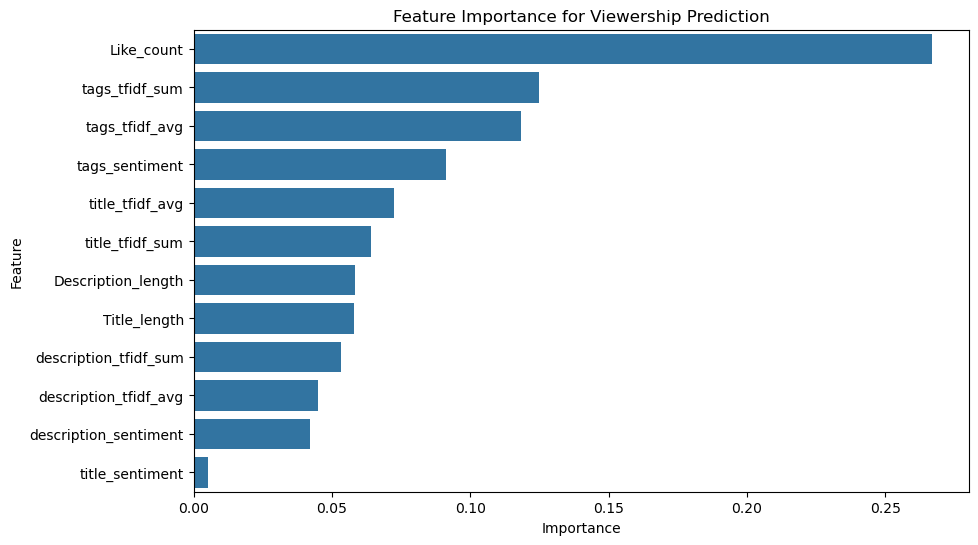

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns


model = RandomForestRegressor(n_estimators=100, max_depth=10, max_features='sqrt', min_samples_leaf = 1, min_samples_split=2, random_state=42)

model.fit(x_train, y_train)

feature_importances = model.feature_importances_

feature_names = x.columns
importance_df = pd.DataFrame({'Feature':feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y = 'Feature', data=importance_df)
plt.title('Feature Importance for Viewership Prediction')
plt.show()

In [43]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("mse: ", mse)
print("r2: ", r2)
print("mae: ", mae)

mse:  51192541844498.57
r2:  0.14285030758932427
mae:  3490699.1600484126


In [49]:
ifiddf.head()

,View_count,Like_count,Comment_count,Title_length,Description_length,title_sentiment,description_sentiment,tags_sentiment,title_tfidf_0,title_tfidf_1,...,tag_tfidf_46,tag_tfidf_47,tag_tfidf_48,tag_tfidf_49,title_tfidf_sum,description_tfidf_sum,tags_tfidf_sum,title_tfidf_avg,description_tfidf_avg,tags_tfidf_avg
0,3091770,316774,13135,97,2099,0.0,0.000,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,1.000000,1.991052,1.968137,0.022727,0.039821,0.039363
1,12740822,699854,19220,100,1913,0.0,0.000,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,1.000000,1.721715,1.714943,0.022727,0.034434,0.034299
2,1589491,63362,5403,30,608,0.0,0.500,0.0,0.0,0.00000,...,0.0,0.0,1.0,0.0,1.000000,1.000000,1.000000,0.022727,0.020000,0.020000
3,737284,6856,1600,91,897,0.0,0.000,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,1.000000,1.726384,1.000000,0.022727,0.034528,0.020000
4,4382982,379240,18226,86,1748,0.0,0.275,0.0,0.0,0.57735,...,0.0,0.0,0.0,0.0,1.732051,1.851130,1.218370,0.039365,0.037023,0.024367


In [51]:
from sklearn.decomposition import PCA

tfidf_columns = [col for col in df.columns if 'tfidf' in col]
tfidf_data = df[tfidf_columns]

pca = PCA(n_components=5) 
tfidf_pca = pca.fit_transform(tfidf_data)

pca_columns = [f'tfidf_pca_{i}' for i in range(tfidf_pca.shape[1])]
tfidf_pca_df = pd.DataFrame(tfidf_pca, columns=pca_columns)

df = pd.concat([df.drop(columns=tfidf_columns), tfidf_pca_df], axis=1)

df.head()


,View_count,Like_count,Title_length,Description_length,title_sentiment,description_sentiment,tags_sentiment,tfidf_pca_0,tfidf_pca_1,tfidf_pca_2,tfidf_pca_3,tfidf_pca_4
0,3091770,316774,97,2099,0.0,0.000,0.0,0.622167,0.142963,0.511167,-2.809854e-17,3.591904e-19
1,12740822,699854,100,1913,0.0,0.000,0.0,0.289407,0.106517,0.354174,1.014628e-18,-9.726508e-18
2,1589491,63362,30,608,0.0,0.500,0.0,-0.614393,-0.010059,-0.095253,-9.130675e-19,-2.434102e-18
3,737284,6856,91,897,0.0,0.000,0.0,0.055892,-0.265818,-0.209924,-1.394604e-19,1.747240e-18
4,4382982,379240,86,1748,0.0,0.275,0.0,0.386809,0.374135,-0.493474,-2.287363e-18,2.316098e-18


In [52]:
from sklearn.model_selection import train_test_split

x = df.drop("View_count", axis=1)
y = df["View_count"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(x_train)

    Like_count  Title_length  Description_length  title_sentiment  \
12      127348            44                 738         0.000000   
4       379240            86                1748         0.000000   
37       97301            42                  21         0.000000   
8        88103            69                1507         0.136364   
3         6856            91                 897         0.000000   
6         5200            98                1751         0.500000   
41       25006            94                 734         0.000000   
46       26973            68                1191         0.000000   
47       14627            42                1578         0.000000   
15       44910            49                2575         0.000000   
9        46994            36                 777         0.000000   
16      309393            97                1561         0.000000   
24        2160            87                4890         0.000000   
34       24699            55      

In [53]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [100, 300, 500, 1000],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3],
    'max_features': ['auto', 'sqrt', 'log2']

}

grid_search = GridSearchCV(rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='r2')

grid_search.fit(x_train, y_train)

print("Best Parameters", grid_search.best_params_)

best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(x_test)


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Parameters {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


/Users/viditparashar/miniconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
452 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/viditparashar/miniconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/viditparashar/miniconda3/lib/python3.12/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/Users/viditparashar/miniconda3/lib/python3.12/site-packages/sklearn/base.py", line 666, in _validate_params
    validat

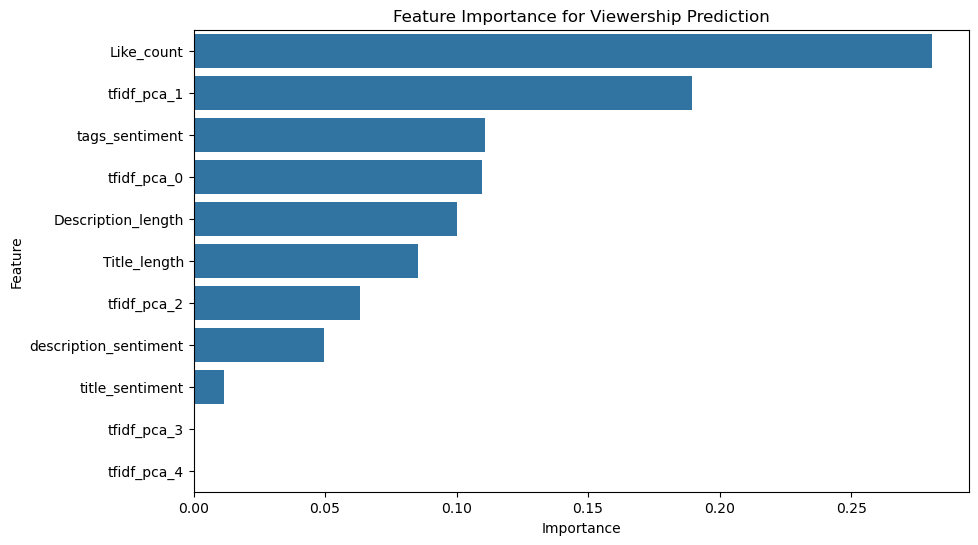

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns


model = RandomForestRegressor(n_estimators=100, max_depth=10, max_features='sqrt', min_samples_leaf = 1, min_samples_split=2, random_state=42)

model.fit(x_train, y_train)

feature_importances = model.feature_importances_

feature_names = x.columns
importance_df = pd.DataFrame({'Feature':feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y = 'Feature', data=importance_df)
plt.title('Feature Importance for Viewership Prediction')
plt.show()

In [55]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("mse: ", mse)
print("r2: ", r2)
print("mae: ", mae)

mse:  42827476988822.48
r2:  0.282911974966926
mae:  3184725.7044333327


In [58]:
 OtherDf = ifiddf.copy()
 
 ifiddf.head()

,View_count,Like_count,Comment_count,Title_length,Description_length,title_sentiment,description_sentiment,tags_sentiment,title_tfidf_0,title_tfidf_1,...,tag_tfidf_46,tag_tfidf_47,tag_tfidf_48,tag_tfidf_49,title_tfidf_sum,description_tfidf_sum,tags_tfidf_sum,title_tfidf_avg,description_tfidf_avg,tags_tfidf_avg
0,3091770,316774,13135,97,2099,0.0,0.000,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,1.000000,1.991052,1.968137,0.022727,0.039821,0.039363
1,12740822,699854,19220,100,1913,0.0,0.000,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,1.000000,1.721715,1.714943,0.022727,0.034434,0.034299
2,1589491,63362,5403,30,608,0.0,0.500,0.0,0.0,0.00000,...,0.0,0.0,1.0,0.0,1.000000,1.000000,1.000000,0.022727,0.020000,0.020000
3,737284,6856,1600,91,897,0.0,0.000,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,1.000000,1.726384,1.000000,0.022727,0.034528,0.020000
4,4382982,379240,18226,86,1748,0.0,0.275,0.0,0.0,0.57735,...,0.0,0.0,0.0,0.0,1.732051,1.851130,1.218370,0.039365,0.037023,0.024367


In [59]:
from sklearn.decomposition import PCA

tfidf_columns = [col for col in ifiddf.columns if 'tfidf' in col]
tfidf_data = ifiddf[tfidf_columns]

pca = PCA(n_components=5) 
tfidf_pca = pca.fit_transform(tfidf_data)

pca_columns = [f'tfidf_pca_{i}' for i in range(tfidf_pca.shape[1])]
tfidf_pca_df = pd.DataFrame(tfidf_pca, columns=pca_columns)

ifiddf = pd.concat([ifiddf.drop(columns=tfidf_columns), tfidf_pca_df], axis=1)

ifiddf.head()

,View_count,Like_count,Comment_count,Title_length,Description_length,title_sentiment,description_sentiment,tags_sentiment,tfidf_pca_0,tfidf_pca_1,tfidf_pca_2,tfidf_pca_3,tfidf_pca_4
0,3091770,316774,13135,97,2099,0.0,0.000,0.0,0.049007,1.924719,0.104855,-0.270882,-1.032421
1,12740822,699854,19220,100,1913,0.0,0.000,0.0,-0.140519,1.769705,-0.187088,-0.277826,-1.129870
2,1589491,63362,5403,30,608,0.0,0.500,0.0,-2.045287,0.672539,0.565714,0.274824,-0.121869
3,737284,6856,1600,91,897,0.0,0.000,0.0,0.461221,-0.692465,-0.061259,-0.553700,0.059667
4,4382982,379240,18226,86,1748,0.0,0.275,0.0,0.698925,-0.481638,0.062882,-0.535850,0.035380


In [60]:
from sklearn.model_selection import train_test_split

x = ifiddf.drop("View_count", axis=1)
y = ifiddf["View_count"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(x_train)

    Like_count  Comment_count  Title_length  Description_length  \
12      127348          15224            44                 738   
4       379240          18226            86                1748   
37       97301           6995            42                  21   
8        88103           2243            69                1507   
3         6856           1600            91                 897   
6         5200            101            98                1751   
41       25006            246            94                 734   
46       26973           1510            68                1191   
47       14627            680            42                1578   
15       44910           3909            49                2575   
9        46994           3086            36                 777   
16      309393           8542            97                1561   
24        2160            574            87                4890   
34       24699           1242            55                154

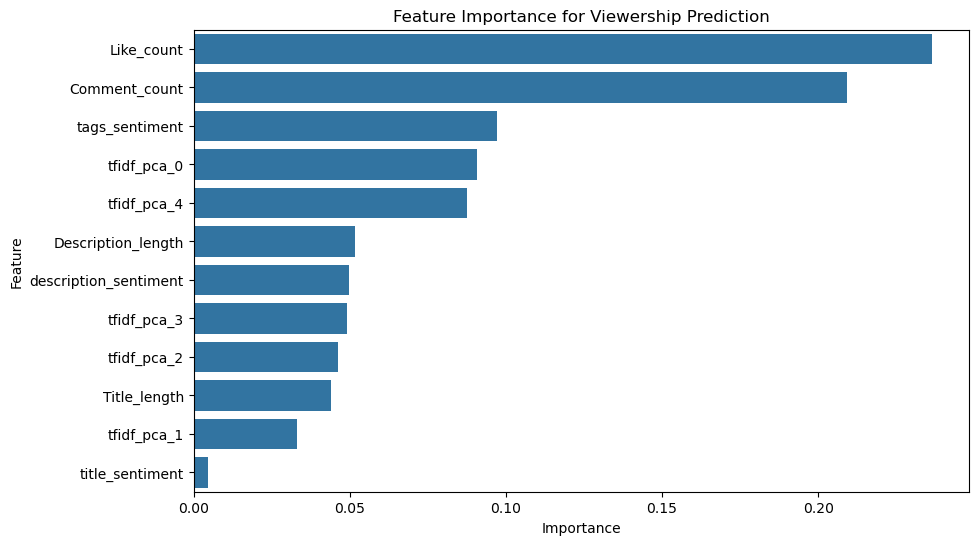

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns


model = RandomForestRegressor(n_estimators=100, max_depth=10, max_features='sqrt', min_samples_leaf = 1, min_samples_split=2, random_state=42)

model.fit(x_train, y_train)

feature_importances = model.feature_importances_

feature_names = x.columns
importance_df = pd.DataFrame({'Feature':feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y = 'Feature', data=importance_df)
plt.title('Feature Importance for Viewership Prediction')
plt.show()

In [62]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("mse: ", mse)
print("r2: ", r2)
print("mae: ", mae)

mse:  42827476988822.48
r2:  0.282911974966926
mae:  3184725.7044333327


In [64]:
OtherDf.head()

MoreDF = OtherDf.copy()

In [66]:
import numpy as np

X_tfidf = np.hstack([title_tfidf, description_tfidf, tag_tfidf])  


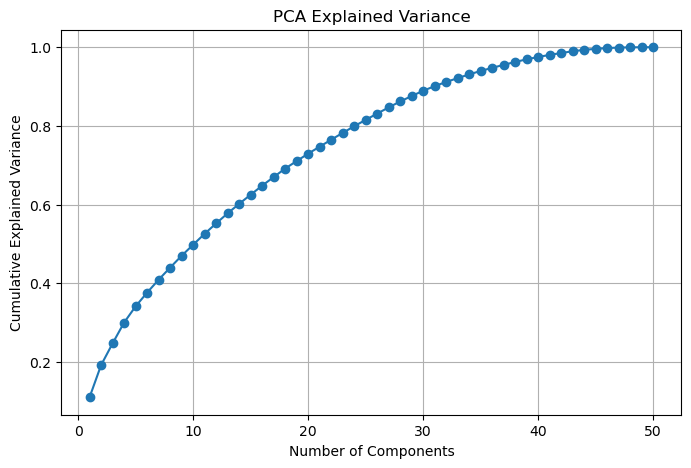

Number of components to retain 95% variance: 37


In [67]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Assuming `X_tfidf` is the matrix with TF-IDF features
pca = PCA()  # Start without specifying n_components
pca.fit(X_tfidf)

# Plot cumulative explained variance
explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.grid(True)
plt.show()

# Find the number of components for 95% explained variance
n_components_95 = np.argmax(explained_variance_ratio >= 0.95) + 1
print(f"Number of components to retain 95% variance: {n_components_95}")


In [68]:
OtherDf.head()

,View_count,Like_count,Comment_count,Title_length,Description_length,title_sentiment,description_sentiment,tags_sentiment,title_tfidf_0,title_tfidf_1,...,tag_tfidf_46,tag_tfidf_47,tag_tfidf_48,tag_tfidf_49,title_tfidf_sum,description_tfidf_sum,tags_tfidf_sum,title_tfidf_avg,description_tfidf_avg,tags_tfidf_avg
0,3091770,316774,13135,97,2099,0.0,0.000,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,1.000000,1.991052,1.968137,0.022727,0.039821,0.039363
1,12740822,699854,19220,100,1913,0.0,0.000,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,1.000000,1.721715,1.714943,0.022727,0.034434,0.034299
2,1589491,63362,5403,30,608,0.0,0.500,0.0,0.0,0.00000,...,0.0,0.0,1.0,0.0,1.000000,1.000000,1.000000,0.022727,0.020000,0.020000
3,737284,6856,1600,91,897,0.0,0.000,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,1.000000,1.726384,1.000000,0.022727,0.034528,0.020000
4,4382982,379240,18226,86,1748,0.0,0.275,0.0,0.0,0.57735,...,0.0,0.0,0.0,0.0,1.732051,1.851130,1.218370,0.039365,0.037023,0.024367


In [69]:
tfidf_columns = [col for col in OtherDf.columns if 'tfidf' in col]
tfidf_data = OtherDf[tfidf_columns]

pca = PCA(n_components=37) 
tfidf_pca = pca.fit_transform(tfidf_data)

pca_columns = [f'tfidf_pca_{i}' for i in range(tfidf_pca.shape[1])]
tfidf_pca_df = pd.DataFrame(tfidf_pca, columns=pca_columns)

OtherDf = pd.concat([OtherDf.drop(columns=tfidf_columns), tfidf_pca_df], axis=1)

OtherDf.head()

,View_count,Like_count,Comment_count,Title_length,Description_length,title_sentiment,description_sentiment,tags_sentiment,tfidf_pca_0,tfidf_pca_1,...,tfidf_pca_27,tfidf_pca_28,tfidf_pca_29,tfidf_pca_30,tfidf_pca_31,tfidf_pca_32,tfidf_pca_33,tfidf_pca_34,tfidf_pca_35,tfidf_pca_36
0,3091770,316774,13135,97,2099,0.0,0.000,0.0,0.048930,1.923909,...,-0.149563,0.240494,-0.336304,0.356254,-0.258934,0.078434,0.032920,0.186241,0.475894,0.603184
1,12740822,699854,19220,100,1913,0.0,0.000,0.0,-0.140604,1.769054,...,-0.065128,0.144967,-0.333728,0.281126,0.012485,0.147746,0.073808,0.091815,-0.274306,-0.659186
2,1589491,63362,5403,30,608,0.0,0.500,0.0,-2.045240,0.672950,...,-0.181711,-0.455109,0.354849,-0.476216,0.120835,0.095523,-0.378714,-0.198725,-0.721748,-0.796939
3,737284,6856,1600,91,897,0.0,0.000,0.0,0.461243,-0.690297,...,-0.410874,0.005824,-0.173253,0.227488,-0.260772,0.001949,-0.055163,-0.053186,-0.056622,0.024094
4,4382982,379240,18226,86,1748,0.0,0.275,0.0,0.699236,-0.481363,...,-0.059498,0.062417,0.029905,-0.096703,-0.158303,-0.008093,0.034324,-0.090510,-0.044383,-0.001748


In [70]:
x = OtherDf.drop("View_count", axis=1)
y = OtherDf["View_count"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(x_train)

    Like_count  Comment_count  Title_length  Description_length  \
12      127348          15224            44                 738   
4       379240          18226            86                1748   
37       97301           6995            42                  21   
8        88103           2243            69                1507   
3         6856           1600            91                 897   
6         5200            101            98                1751   
41       25006            246            94                 734   
46       26973           1510            68                1191   
47       14627            680            42                1578   
15       44910           3909            49                2575   
9        46994           3086            36                 777   
16      309393           8542            97                1561   
24        2160            574            87                4890   
34       24699           1242            55                154

In [71]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [100, 300, 500, 1000],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3],
    'max_features': ['auto', 'sqrt', 'log2']

}

grid_search = GridSearchCV(rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='r2')

grid_search.fit(x_train, y_train)

print("Best Parameters", grid_search.best_params_)

best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(x_test)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Parameters {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 100}


/Users/viditparashar/miniconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
293 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/viditparashar/miniconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/viditparashar/miniconda3/lib/python3.12/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/Users/viditparashar/miniconda3/lib/python3.12/site-packages/sklearn/base.py", line 666, in _validate_params
    validat

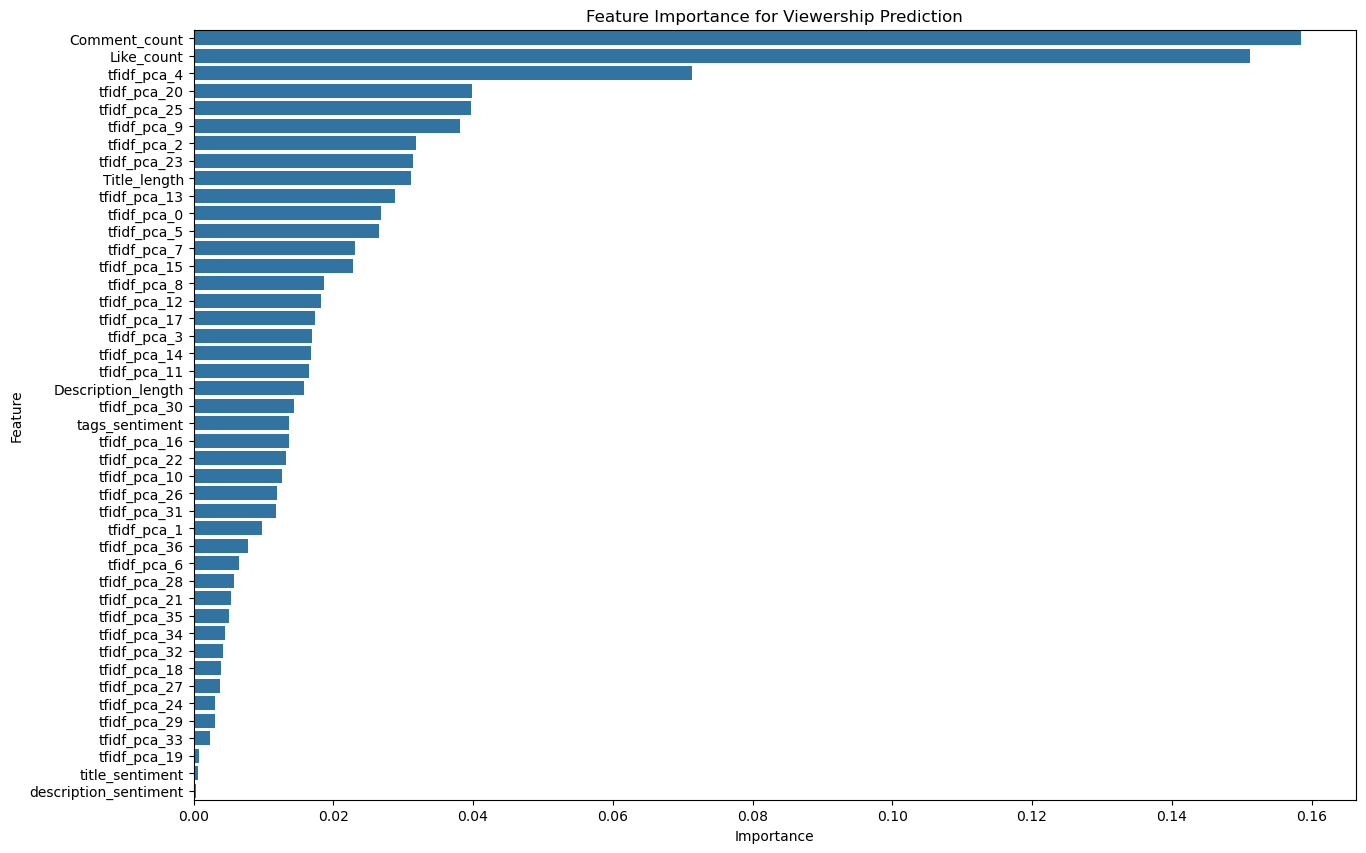

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns


model = RandomForestRegressor(n_estimators=100, max_depth=10, max_features='sqrt', min_samples_leaf = 3, min_samples_split=2, random_state=42)

model.fit(x_train, y_train)

feature_importances = model.feature_importances_

feature_names = x.columns
importance_df = pd.DataFrame({'Feature':feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(15,10))
sns.barplot(x='Importance', y = 'Feature', data=importance_df)
plt.title('Feature Importance for Viewership Prediction')
plt.show()

In [93]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("mse: ", mse)
print("r2: ", r2)
print("mae: ", mae)

mse:  40875058901793.25
r2:  0.3156025682146216
mae:  3332511.8200517674


In [74]:
AnotherDF = MoreDF.copy()

In [85]:
from catboost import CatBoostRegressor

# Define parameter grid

#One column for vector
#catgeories column for textual data
#can divide sentiment column in categories


catboost_param_grid = {
    'iterations': [500, 1000],
    'depth': [6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'l2_leaf_reg': [1, 3, 5, 7],
    'border_count': [32, 64, 128]
}

catboost = CatBoostRegressor(random_state=42, silent=True)

# Grid Search
catboost_grid_search = GridSearchCV(estimator=catboost, param_grid=catboost_param_grid, scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=-1)
catboost_grid_search.fit(x_train, y_train)

# Best model
catboost_best = catboost_grid_search.best_estimator_
y_pred_catboost = catboost_best.predict(x_test)



Fitting 5 folds for each of 216 candidates, totalling 1080 fits


/Users/viditparashar/miniconda3/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters <catboost.core.CatBoostRegressor object at 0x169121400>


In [87]:
print("Best Parameters:", catboost_grid_search.best_params_)

Best Parameters: {'border_count': 32, 'depth': 6, 'iterations': 1000, 'l2_leaf_reg': 5, 'learning_rate': 0.05}


In [88]:
cb_model = CatBoostRegressor(border_count = 32, depth = 6, iterations= 1000, l2_leaf_reg= 5, learning_rate= 0.05, random_state = 42)
cb_model.fit(x_train, y_train)

cb_pred = cb_model.predict(x_test)

cb_mse = mean_squared_error(y_test, cb_pred)
cb_mae = mean_absolute_error(y_test, cb_pred)
cb_r2 = r2_score(y_test, cb_pred)

print("XGBoost Model Performance:")
print(f"Mean Squared Error (MSE): {cb_mse}")
print(f"Mean Absolute Error (MAE): {cb_mae}")
print(f"R^2 Score: {cb_r2}")

0:	learn: 5561868.6626493	total: 1.32ms	remaining: 1.32s
1:	learn: 5504387.7366209	total: 1.8ms	remaining: 897ms
2:	learn: 5467688.7365060	total: 2.18ms	remaining: 724ms
3:	learn: 5437751.0468319	total: 2.59ms	remaining: 644ms
4:	learn: 5389959.9382985	total: 2.94ms	remaining: 585ms
5:	learn: 5342695.1463977	total: 3.27ms	remaining: 542ms
6:	learn: 5307061.3661712	total: 3.49ms	remaining: 495ms
7:	learn: 5269222.3079134	total: 3.91ms	remaining: 485ms
8:	learn: 5203073.4797304	total: 4.29ms	remaining: 472ms
9:	learn: 5160066.6898570	total: 4.7ms	remaining: 465ms
10:	learn: 5121418.7226942	total: 5.9ms	remaining: 531ms
11:	learn: 5086729.5373379	total: 6.31ms	remaining: 519ms
12:	learn: 5053681.4802867	total: 6.68ms	remaining: 507ms
13:	learn: 5012467.2812526	total: 7.06ms	remaining: 497ms
14:	learn: 4968954.7804718	total: 8.18ms	remaining: 537ms
15:	learn: 4918167.7798606	total: 8.55ms	remaining: 526ms
16:	learn: 4882774.2103818	total: 8.96ms	remaining: 518ms
17:	learn: 4841685.1188221	

In [ ]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

# Generate embeddings for the 'Title' and 'Description' columns
title_embeddings = model.encode(df['Title'].tolist())
description_embeddings = model.encode(df['Description'].tolist())

# Convert embeddings into DataFrames for easier handling
title_embedding_df = pd.DataFrame(title_embeddings)
description_embedding_df = pd.DataFrame(description_embeddings)

# 4. Concatenate Embeddings with Original Features
# Concatenate the embeddings with the original DataFrame
features = pd.concat([title_embedding_df, description_embedding_df], axis=1)

# Add any additional features you may have (e.g., Like_count, Comment_count, etc.)
features = pd.concat([features, df[['Like_count', 'Comment_count']]], axis=1)

# 5. Prepare the Dataset for Model Training
# Prepare features (X) and target (y)
X = features
y = df['View_count']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Train a Random Forest Model
# Initialize the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# 7. Evaluate the Model
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# 8. Feature Importance (Optional)
# Get feature importances from the trained model
importances = model.feature_importances_

# Create a DataFrame to view feature importance
features_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Print feature importance
print(features_importance_df)

# 9. Dimensionality Reduction (Optional)
# Apply PCA to reduce the dimensionality of the embeddings
pca = PCA(n_components=50)  # Reduce to 50 components (adjust based on your dataset)
X_reduced = pca.fit_transform(X)

# Split the reduced data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Train the model on the reduced data
model.fit(X_train, y_train)

# Make predictions and evaluate performance
y_pred = model.predict(X_test)
mse_pca = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (PCA): {mse_pca}')

# 10. Model Tuning (Optional)
from sklearn.model_selection import GridSearchCV

# Set up a parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
}

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters
print(f"Best Parameters: {grid_search.best_params_}")

# 11. Final Evaluation
# Final model evaluation with tuned hyperparameters
final_model = grid_search.best_estimator_

# Make predictions on the test set
final_y_pred = final_model.predict(X_test)

# Evaluate the model
final_mse = mean_squared_error(y_test, final_y_pred)
print(f'Final Mean Squared Error: {final_mse}')
